<a href="https://colab.research.google.com/github/noora20FH/DataScience_Course/blob/main/HW_8_noora.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name : Noora Aulia Hidayat

ID Num: 112710047

In [14]:
import pandas as pd
import numpy as np

# Install NumPy if not already installed
!pip install numpy

# Fetch data
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

# Combine data
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Create a DataFrame
df = pd.DataFrame(data, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'RAD', 'TAX', 'PTRATIO', 'B'])
df['MEDV'] = target




In a machine learning context, especially in a regression problem where you're aiming to predict a continuous value (in this case, the median value of homes), the MEDV column would typically be designated as the target variable.

When building a predictive model to forecast or estimate the median house value based on other attributes or features (like crime rate, number of rooms, etc., present in the dataset), MEDV would indeed serve as the target variable that the model will try to predict.






In [15]:
# Display the first few rows of the DataFrame
print("DataFrame:")
print(df.head())

# Display DataFrame shape
print("\nDataFrame Shape:")
print(df.shape)


DataFrame:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    RAD   TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

   PTRATIO     B  MEDV  
0   396.90  4.98  24.0  
1   396.90  9.14  21.6  
2   392.83  4.03  34.7  
3   394.63  2.94  33.4  
4   396.90  5.33  36.2  

DataFrame Shape:
(506, 14)


In [16]:
print("DataFrame:")
print(df.tail())

DataFrame:
        CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    RAD   TAX  \
501  0.06263  0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0  21.0   
502  0.04527  0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0  21.0   
503  0.06076  0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0  21.0   
504  0.10959  0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0  21.0   
505  0.04741  0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0  21.0   

     PTRATIO     B  MEDV  
501   391.99  9.67  22.4  
502   396.90  9.08  20.6  
503   396.90  5.64  23.9  
504   393.45  6.48  22.0  
505   396.90  7.88  11.9  


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score


X = df.drop('MEDV', axis=1)
y = df['MEDV']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create SVR model
svr = SVR(kernel='linear', C=1.0, epsilon=0.1)

# Fit the SVR model using the training data
svr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = svr.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 29.435908618391455
R-squared: 0.5986037082794649


<ipython-input-18-15b0df65b852>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, color='red', label='Ideal line')


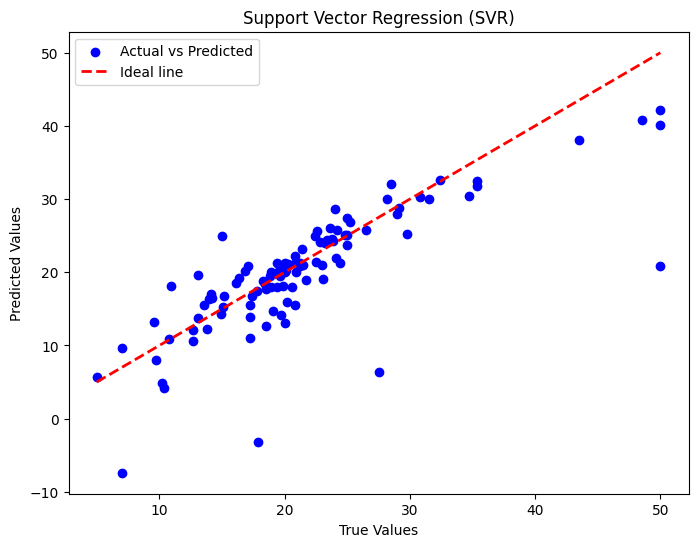

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, color='red', label='Ideal line')

plt.title('Support Vector Regression (SVR)')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


**Analisis**

based on the visualization, we can see that the blue dotes are the instance from the test set. closer the points with the ideaL line suggests better prediction. from this visualization we can get the insight that the Boston housing prise have a good prediction


